# Resampling Methods

##### For a better and more in depth explanation of Resampling methods, refer to the free online book "An Introduction to Statistical Learning with Applications in R by James et. al. [http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)

Another very good books is The Elements of Statistical Learning by Hastie et al 2017. 
[https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12.pdf](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12.pdf) 

Most of you are familiar with the terms *training* and *testing* sets which refer to splitting the data into two subsets that will be used to "develop" the model - the learning step - and a to test the model -the evaluation step. 

For example: if we want to understand how much variation we can expect from a linear regression, using resampling methods we can draw multiple random samples from the training data, fit a linear regression to each sample, and measure how much variation there is across subsets.

We have already seen few aspects of resampling methods when we used boostrapping to obtain confidence intervals around a mean. Boostrapping is an efficient and powerful method to increase the level of accuracy of a parameter estimate.

Another resampling technique that will be the focus for this lecture is Cross-validation.

# Cross-validation

Cross-validation can be used to evaluate the performance of a statistical test, and to estimate a measurement of error from this statistical analysis more accurately.

The basic concept as mentioned before is to partition the data into subsets that can be used to measure the error differences across subsets and to evaluate the performance using a hold out set or test set.

Typically, one of the most frequently used error estimators for regression models is the MSE(mean squared error), which is a measurement of quality of the fit for a particular model.

The idea is to measure how close is the predicted response for each observation to the true response value for that observation.

$$ MSE = \frac {1}{n} \sum _{i = 1}^{n} (y_i - \hat {f}(x_i))^2  $$

Where $\hat{f}_i$ is the prediction of $\hat{f}$ on each observation. 

In [1]:
diabetes = read.csv("diabetes.csv", header = T, stringsAsFactors = F)
diabetes = diabetes[!diabetes$Glucose==0,]
diabetes = diabetes[!diabetes$Insulin==0,]

[1] 0.5607508


Call:
lm(formula = diabetes$Insulin ~ diabetes$Glucose)

Residuals:
    Min      1Q  Median      3Q     Max 
-255.71  -51.14  -15.80   28.52  444.01 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -95.84200   11.78986  -8.129 1.22e-15 ***
diabetes$Glucose   2.03087    0.09299  21.841  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.14 on 1040 degrees of freedom
Multiple R-squared:  0.3144,	Adjusted R-squared:  0.3138 
F-statistic:   477 on 1 and 1040 DF,  p-value: < 2.2e-16


[1] 8489.78

[1] 12387.71

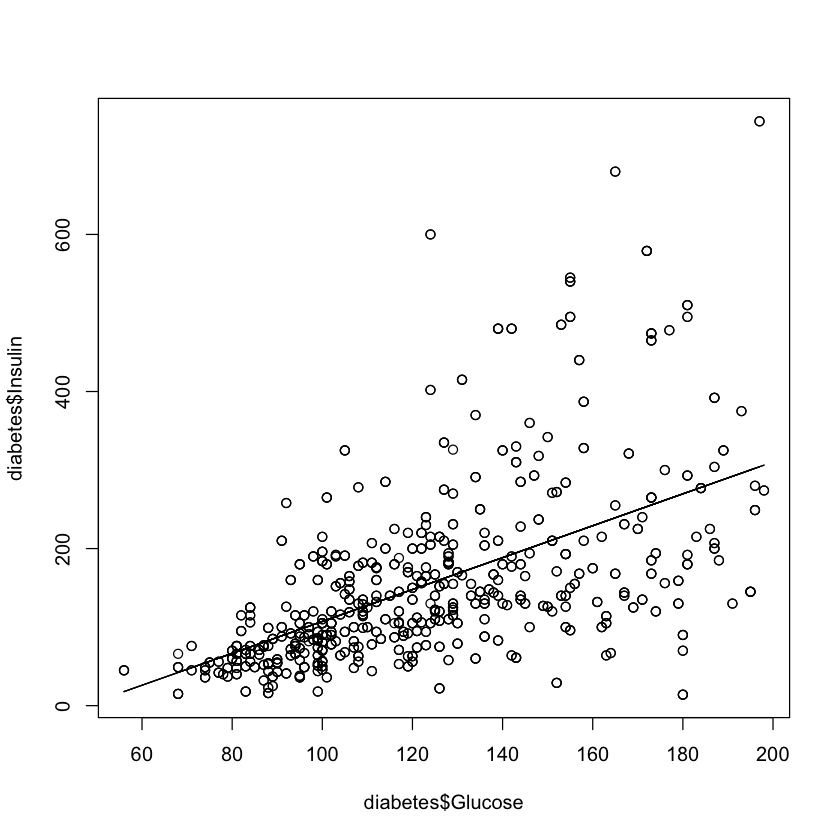

In [13]:

#Plot data and regression line

dia_lm = lm(diabetes$Insulin ~ diabetes$Glucose)
plot(diabetes$Glucose, diabetes$Insulin)
lines(diabetes$Glucose, dia_lm$fitted.values)

cor(diabetes$Glucose, diabetes$Insulin)

sm = summary(dia_lm)
summary(dia_lm)

##Find mse
92.14^2 ##From the Residual standard error in the summary of the model

##AIC is another heaviliy used meausrement of the fit of the data, the lower the number
##the better the fit.
AIC(dia_lm)


In [3]:
rmse <- function(error)
{
  sqrt(mean(error^2))
}
rmse(dia_lm$residuals)

RSS <- c(crossprod(dia_lm$residuals))
MSE <- RSS / length(dia_lm$residuals)
RMSE <- sqrt(MSE)

[1] 92.05474

This MSE is the overall MSE for the model, however, we want to evaluate how well the method works on an untested set (partition) not used to train the model.

One option would also be to calculate the MSE from the model used for training and ideally this values is very small giving an indication of how good the model is for that partition. However, we don't really care to know how well the model predict what we already know, or to calculate a training MSE. What we want to do is to evaluate the model to a subset that has not been used to evaluate the model.

We want to chose a method that gives the lowest MSE, as opposed to the lowest training MSE, if we have a large number of test observations we can calculate the average MSE and select a model with the lowest test MSE.



## How good is the model in predicting the data

By using the whole dataset to run the model we have no way to test how good the model is in predicting new data, for this reason we will split the dataset into training and testing (80/20) sample.

Once we are able to use the model to predict values from the testing samples we can evaluate accuracy and error rates of the model

In [4]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(diabetes), 0.8*nrow(diabetes))  # row indices for training data
trainingData <- diabetes[trainingRowIndex, ]  # model training data
testData  <- diabetes[-trainingRowIndex, ]   #

In [6]:
lmMod <- lm(Insulin ~ Glucose, data=trainingData)  # build the model
distPred <- predict(lmMod, testData)
summary (lmMod)
91.69^2#8407.056
AIC(lmMod)  ##smaller than original model - good


Call:
lm(formula = Insulin ~ Glucose, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-258.61  -51.15  -14.85   29.48  443.79 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -101.5304    12.9874  -7.818 1.63e-14 ***
Glucose        2.0785     0.1026  20.263  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.31 on 831 degrees of freedom
Multiple R-squared:  0.3307,	Adjusted R-squared:  0.3299 
F-statistic: 410.6 on 1 and 831 DF,  p-value: < 2.2e-16


[1] 8407.056

[1] 9888.638

### We will evaluate accuracy by correlating the actuals and predicted values

In [10]:
actuals_preds <- data.frame(cbind(actuals=testData$Insulin, 
                                  predicteds=distPred))  # make actuals_predicteds dataframe.
correlation_accuracy <- cor(actuals_preds)  # 55.01%
head(actuals_preds)

,actuals,predicteds
,<dbl>,<dbl>
5,480,187.38650
9,66,70.98834
16,76,66.83127
17,145,303.78466
41,70,272.60658
57,304,287.15635


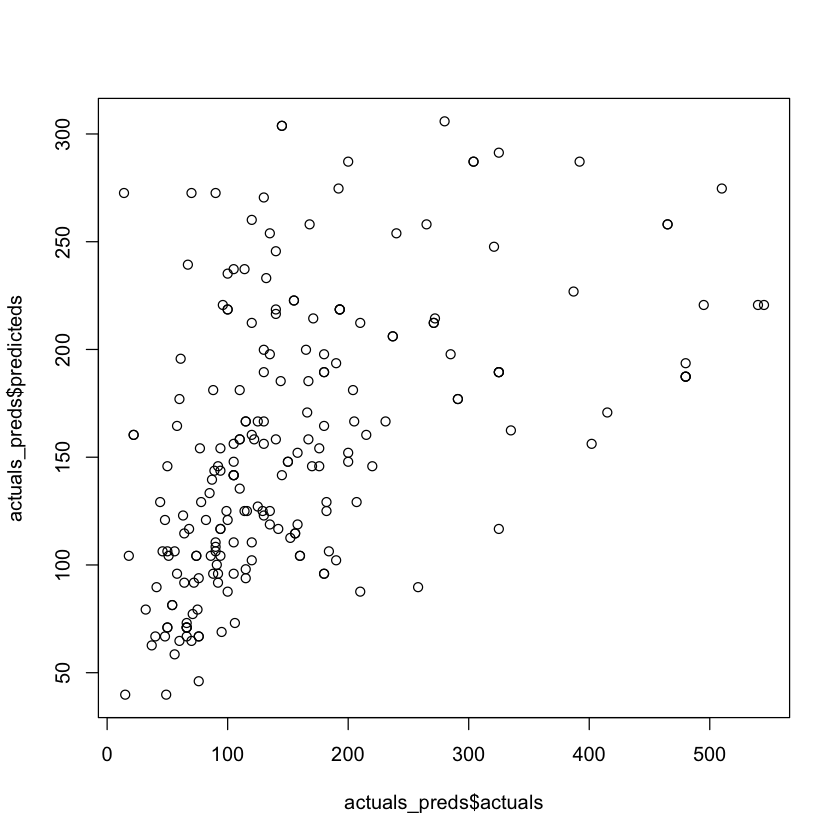

In [11]:
plot(actuals_preds$actuals, actuals_preds$predicteds)

### We can also calculate the ration between the minum and maxumum predictions which another metric of accuracy as well as the mean absolute Percentage error

In [15]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))  
min_max_accuracy
# => 70.14%, min_max accuracy (values may vary based on the sampling)
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals) 
mape
# => 61.59%, mean absolute percentage error, relatively high

[1] 0.6904743

[1] 0.6332627

#### Let's do now a more strict analysis of the data by using the k-fold Cross validation technique, where we split the data in n folds and use each fold except one as our training set and evaluate each training set agains the testing fold. As our predictor we will obtain the mean of all MSEs from each prediction.

## A. Leave one out cross validation

#### In this method we will randomly remove one data point at the time from the data set and evaluate the errors for each model.
#### Find the average of all test errors which will become the prediction error

In [41]:
library(caret)
# Define training control
train.control <- trainControl(method = "LOOCV")
# Train the model
model <- train(Insulin ~ Glucose, data = diabetes, method = "lm",
               trControl = train.control)
# Summarize the results
print(model)


Linear Regression 

1042 samples
   1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1041, 1041, 1041, 1041, 1041, 1041, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  92.27937  0.311101  62.81733

Tuning parameter 'intercept' was held constant at a value of TRUE


## B. K-fold cross-validation

#### Split the data into K smaller groups, leaving one of these groups as the test subset.
#### run the model on each group and predict the model against the test group
#### Repeat this process X times using a different subset as the test group
#### Compute the mean of each K error from which we will evaulate the model.

In [20]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Insulin ~ Glucose, data = diabetes, method = "lm",
               trControl = train.control)
# Summarize the results
print(model)


Linear Regression 

1042 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 937, 938, 937, 938, 938, 937, ... 
Resampling results:

  RMSE      Rsquared   MAE   
  91.71111  0.3214232  62.838

Tuning parameter 'intercept' was held constant at a value of TRUE


## C. Repeated K-fold cross-validation

#### The k-fold cross validation is repeated multiple times using different randomly selected subsets
#### Computationaly more intensive

In [21]:
# Define training control
set.seed(123)
train.control <- trainControl(method = "repeatedcv", 
                              number = 10, repeats = 3)
# Train the model
model <- train(Insulin ~ Glucose, data = diabetes, method = "lm",
               trControl = train.control)
# Summarize the results
print(model)

Linear Regression 

1042 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 937, 938, 937, 938, 938, 937, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  91.48087  0.3256945  62.80625

Tuning parameter 'intercept' was held constant at a value of TRUE


# The code below illustrates how we can evaluate tunable parameters to estimate accuracy.

We are going to follow an example directed to understand the use of tunable parameters to estimate the accuracy of the model.

First, we are going to simulate 100 training sets of size 50 from a polynomial regression model, and we will run a polynomial using a cubic spline models with degrees of freedom from 1 to 30 (the tunable parameter). 

### Remember, in this first exercise we are not splitting data from the dataset  to produced the training data, what we are doing is to get data obtained from the same polynomial model.

In [22]:
# Generate the training and test samples
seed <- 1809
set.seed(seed)
 
##Write function to generate x and y dataframe using polynomial x variable taken 
#from a uniform distribution.
gen_data <- function(n, beta, sigma_eps) {
    eps <- rnorm(n, 0, sigma_eps)
    x <- sort(runif(n, 0, 100))
    X <- cbind(1, poly(x, degree = (length(beta) - 1), raw = TRUE))
    y <- as.numeric(X %*% beta + eps)
    
    return(data.frame(x = x, y = y))
}
 
# Fit the models
require(splines)
 
n_rep <- 100
n_df <- 30
df <- 1:n_df
beta <- c(5, -0.1, 0.004, -3e-05) ##These are the different values of beta that will help fit the model to a polynomial
n_train <- 50
n_test <- 10000
sigma_eps <- 0.5
 
xy <- res <- list()
xy_test <- gen_data(n_test, beta, sigma_eps)
for (i in 1:n_rep) {
    xy[[i]] <- gen_data(n_train, beta, sigma_eps)
    x <- xy[[i]][, "x"]
    y <- xy[[i]][, "y"]
    res[[i]] <- apply(t(df), 2, function(degf) lm(y ~ ns(x, df = degf))) ##Generate a Basis Matrix for 
        #Natural Cubic Splines from 1 to 30 degrees of freedom
}

Loading required package: splines



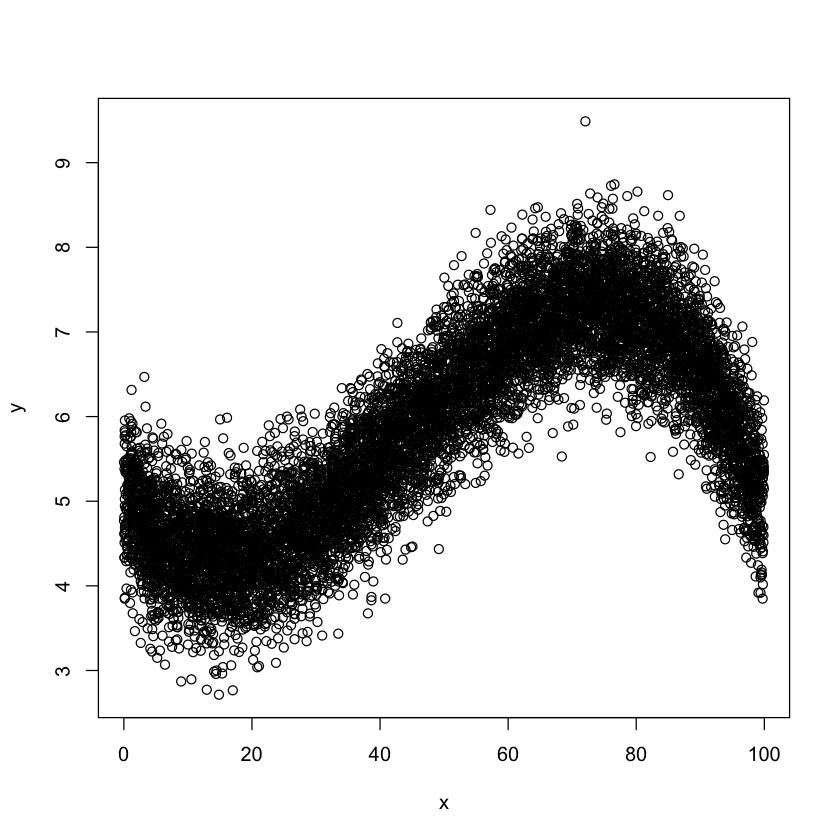

In [23]:
plot(xy_test)

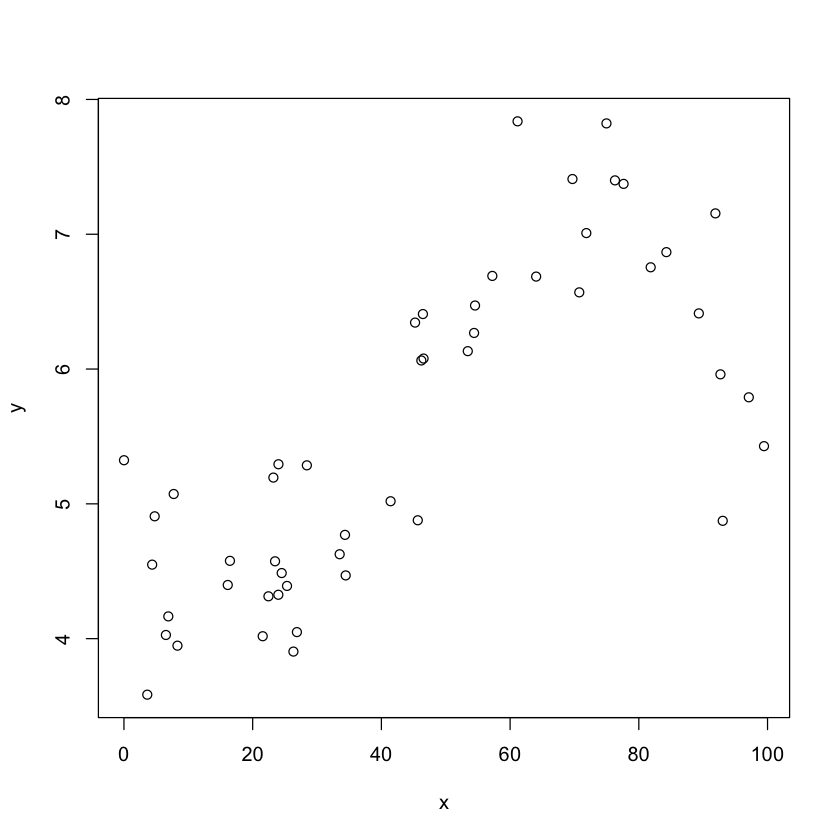

In [24]:
plot(xy[[2]])

Ok now we have our test set and 100 training sets, and that we produced polynomial regressions using different values of splines for the model. Lets visualize how we did on the extreme splines (1,4, and 25) for one of the training sets

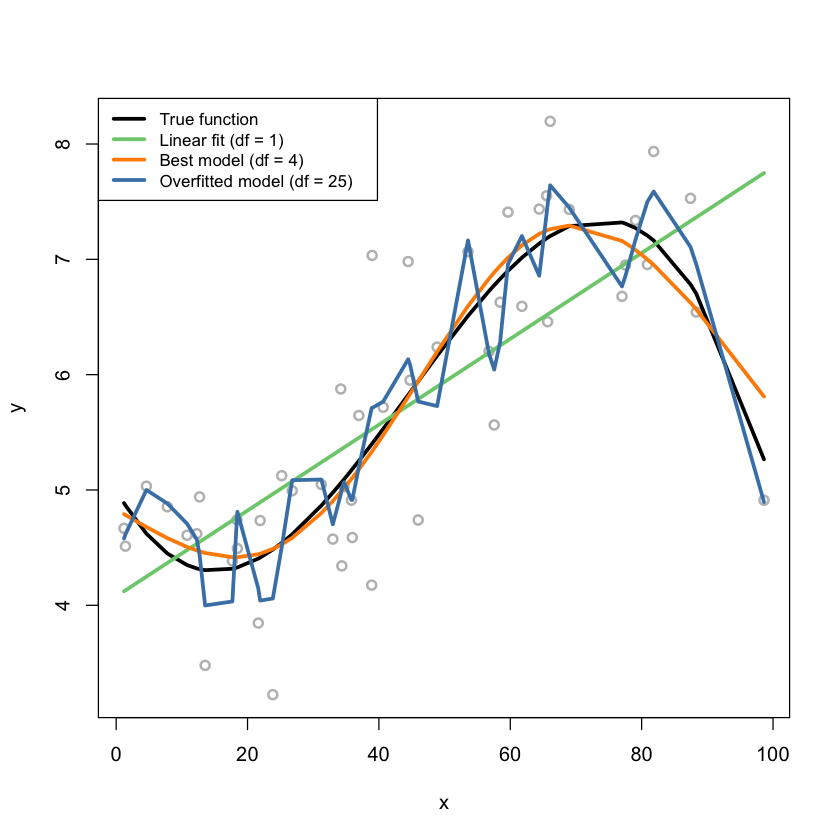

In [25]:
# Plot the data
x <- xy[[1]]$x
X <- cbind(1, poly(x, degree = (length(beta) - 1), raw = TRUE))
y <- xy[[1]]$y
plot(y ~ x, col = "gray", lwd = 2)
lines(x, X %*% beta, lwd = 3, col = "black")
lines(x, fitted(res[[1]][[1]]), lwd = 3, col = "palegreen3")
lines(x, fitted(res[[1]][[4]]), lwd = 3, col = "darkorange")
lines(x, fitted(res[[1]][[25]]), lwd = 3, col = "steelblue")
legend(x = "topleft", legend = c("True function", "Linear fit (df = 1)", "Best model (df = 4)", 
    "Overfitted model (df = 25)"), lwd = rep(3, 4), col = c("black", "palegreen3", 
    "darkorange", "steelblue"), text.width = 32, cex = 0.85)

In [26]:
res[[1]][1]
colfunc <- colorRampPalette(c("blue", "red"))
colors = colfunc(30)

[[1]]

Call:
lm(formula = y ~ ns(x, df = degf))

Coefficients:
     (Intercept)  ns(x, df = degf)  
           4.121             4.523  



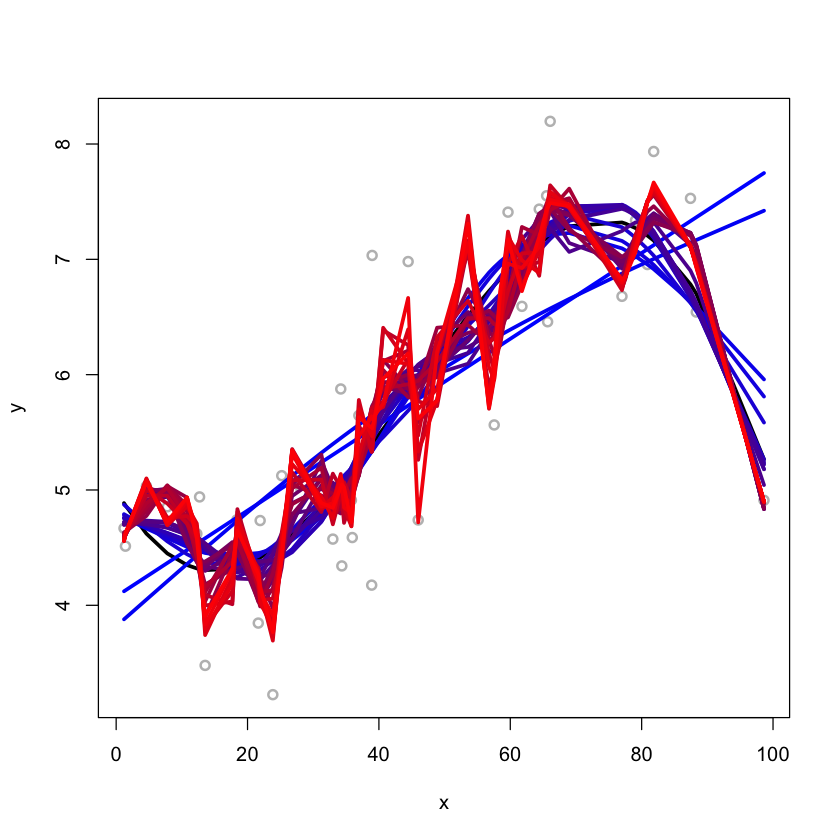

In [27]:
plot(y ~ x, col = "gray", lwd = 2)
lines(x, X %*% beta, lwd = 3, col = "black")
for (i in 1:30){
    lines(x, fitted(res[[1]][[i]]), lwd = 3, col = colors[i])
}

In [ ]:
?fitted

Let's calculate for each training set and model the MSE 

In [28]:
# Compute the training and test errors for each model
pred <- list()
mse <- te <- matrix(NA, nrow = n_df, ncol = n_rep)
for (i in 1:n_rep) {
    mse[, i] <- sapply(res[[i]], function(obj) deviance(obj)/nobs(obj))
    pred[[i]] <- mapply(function(obj, degf) predict(obj, data.frame(x = xy_test$x)), 
        res[[i]], df)
    te[, i] <- sapply(as.list(data.frame(pred[[i]])), function(y_hat) mean((xy_test$y - 
        y_hat)^2))
}
 
# Compute the average training and test errors
av_mse <- rowMeans(mse)
av_te <- rowMeans(te)


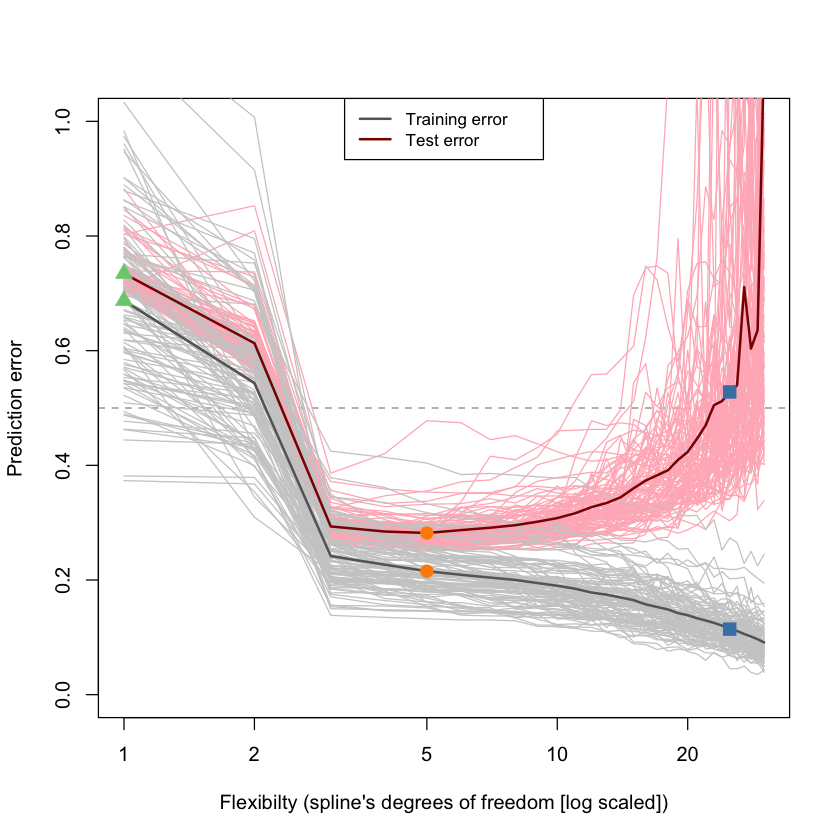

In [29]:
# Plot the errors
plot(df, av_mse, type = "l", lwd = 2, col = gray(0.4), ylab = "Prediction error", 
    xlab = "Flexibilty (spline's degrees of freedom [log scaled])", ylim = c(0, 
        1), log = "x")
abline(h = sigma_eps, lty = 2, lwd = 0.5)
for (i in 1:n_rep) {
    lines(df, te[, i], col = "lightpink")
}
for (i in 1:n_rep) {
    lines(df, mse[, i], col = gray(0.8))
}
lines(df, av_mse, lwd = 2, col = gray(0.4))
lines(df, av_te, lwd = 2, col = "darkred")
points(df[1], av_mse[1], col = "palegreen3", pch = 17, cex = 1.5)
points(df[1], av_te[1], col = "palegreen3", pch = 17, cex = 1.5)
points(df[which.min(av_te)], av_mse[which.min(av_te)], col = "darkorange", pch = 16, 
    cex = 1.5)
points(df[which.min(av_te)], av_te[which.min(av_te)], col = "darkorange", pch = 16, 
    cex = 1.5)
points(df[25], av_mse[25], col = "steelblue", pch = 15, cex = 1.5)
points(df[25], av_te[25], col = "steelblue", pch = 15, cex = 1.5)
legend(x = "top", legend = c("Training error", "Test error"), lwd = rep(2, 2), 
    col = c(gray(0.4), "darkred"), text.width = 0.3, cex = 0.85)

One can see that:

1. the training errors decrease monotonically as the model gets more complicated (and less smooth).

2. The test error initially decreases, and starts increasing again. The change point occurs in correspondence of the orange model, that is, the model that provides a good compromise between bias and variance. 

3. The reason why the test error starts increasing for degrees of freedom larger than 3 or 4 is the so called overfitting problem. Overfitting is the tendency of a model to adapt too well to the training data, at the expense of generalization to previously unseen data points. In other words, an overfitted model fits the noise in the data rather than the actual underlying relationships among the variables. Overfitting usually occurs when a model is unnecessarily complex.

## In order to effectively evaluate the model accuracy we then use Cross-Validation

# K-fold Cross validation

In this approach we randomly split the observations into k groups, or approximately the same size. The first fold or group is treated as the validation set, and the method is fit on the remaining k-1 methods. On each fold we compute the respective MSE and the final MSE value is averaged and compared with the average of the test set from .model

In [30]:
set.seed(seed)
 
n_train <- 100
xy <- gen_data(n_train, beta, sigma_eps)
x <- xy$x
y <- xy$y
 
fitted_models <- apply(t(df), 2, function(degf) lm(y ~ ns(x, df = degf)))
mse <- sapply(fitted_models, function(obj) deviance(obj)/nobs(obj))
 
n_test <- 10000
xy_test <- gen_data(n_test, beta, sigma_eps)
pred <- mapply(function(obj, degf) predict(obj, data.frame(x = xy_test$x)), 
    fitted_models, df)
te <- sapply(as.list(data.frame(pred)), function(y_hat) mean((xy_test$y - y_hat)^2))

    
n_folds <- 10
folds_i <- sample(rep(1:n_folds, length.out = n_train))
cv_tmp <- matrix(NA, nrow = n_folds, ncol = length(df))
for (k in 1:n_folds) {
    test_i <- which(folds_i == k)
    train_xy <- xy[-test_i, ]
    test_xy <- xy[test_i, ]
    x <- train_xy$x
    y <- train_xy$y
    fitted_models <- apply(t(df), 2, function(degf) lm(y ~ ns(x, df = degf)))
    x <- test_xy$x
    y <- test_xy$y
    pred <- mapply(function(obj, degf) predict(obj, data.frame(ns(x, df = degf))), 
        fitted_models, df)
    cv_tmp[k, ] <- sapply(as.list(data.frame(pred)), function(y_hat) mean((y - 
        y_hat)^2))
}
cv <- colMeans(cv_tmp)
 


Loading required package: Hmisc

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




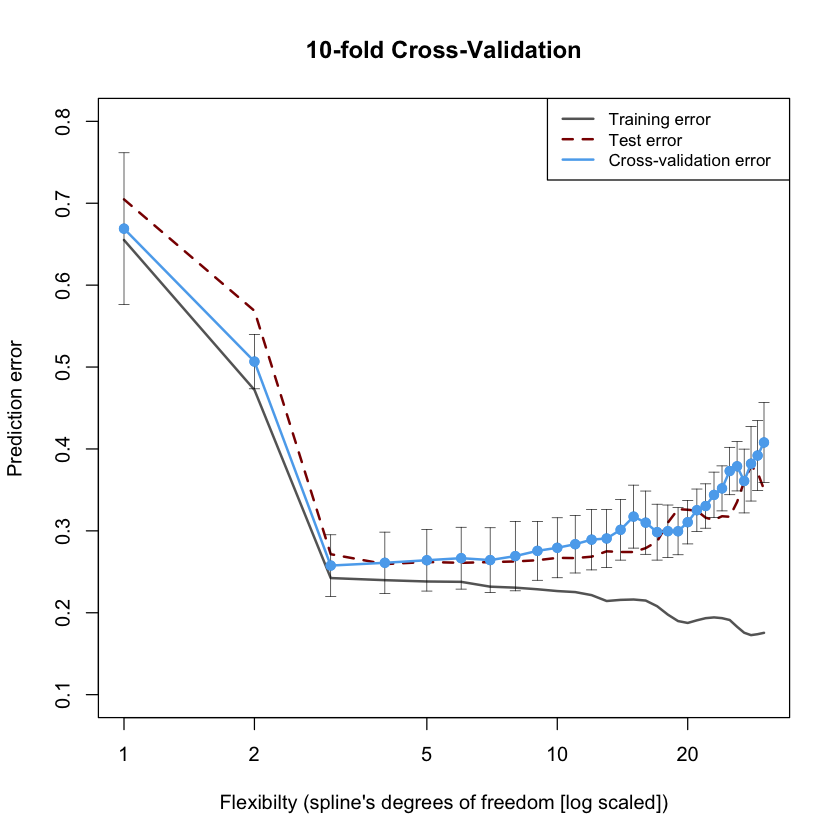

In [31]:
require(Hmisc)
 
plot(df, mse, type = "l", lwd = 2, col = gray(0.4), ylab = "Prediction error", 
    xlab = "Flexibilty (spline's degrees of freedom [log scaled])", main = paste0(n_folds, 
        "-fold Cross-Validation"), ylim = c(0.1, 0.8), log = "x")
lines(df, te, lwd = 2, col = "darkred", lty = 2)
cv_sd <- apply(cv_tmp, 2, sd)/sqrt(n_folds)
errbar(df, cv, cv + cv_sd, cv - cv_sd, add = TRUE, col = "steelblue2", pch = 19, 
    lwd = 0.5)
lines(df, cv, lwd = 2, col = "steelblue2")
points(df, cv, col = "steelblue2", pch = 19)
legend(x = "topright", legend = c("Training error", "Test error", "Cross-validation error"), 
    lty = c(1, 2, 1), lwd = rep(2, 3), col = c(gray(0.4), "darkred", "steelblue2"), 
    text.width = 0.4, cex = 0.85)

To work through a more concrete example continue the tutorial from [http://www.milanor.net/blog/cross-validation-for-predictive-analytics-using-r/](http://www.milanor.net/blog/cross-validation-for-predictive-analytics-using-r/). to the section called:

Doing Cross-Validation With R: the caret Package

### This website has a good tutorial for logistic regression that implements the cost function and gradient descend.
[http://pingax.com/logistic-regression-r-step-step-implementation-part-2/](http://pingax.com/logistic-regression-r-step-step-implementation-part-2/)